In [13]:
import pandas as pd
import pathlib
import numpy as np
import plotly.express as px

In [2]:
# set path to data
data_path = pathlib.Path('../data/raw-case-data/WHO-COVID-19-global-data.csv')

In [3]:
# read in who data to dataframe
who_data = pd.read_csv(data_path)

# need new cases only for each date, for each country - Malaysia, Philippines and Malaysia

In [4]:
# need new cases only for each date, for each country - Malaysia, Philippines and Malaysia
countries = ['Malaysia', 'Philippines', 'Viet Nam']
target_data = who_data.loc[who_data['Country'].isin(countries)]

# set date columb to be datetime and set date column to index
target_data['Date_reported'] = pd.to_datetime(target_data['Date_reported'])
target_data = target_data.set_index('Date_reported')

# drop uneeded columns
target_data = target_data.drop(['Country_code','WHO_region','New_deaths','Cumulative_deaths'], axis=1)

# Convert NaNs to 0
target_data['New_cases'] = target_data['New_cases'].fillna(0)

C:\Users\ehug0006\AppData\Local\Temp\ipykernel_27248\2776319662.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data['Date_reported'] = pd.to_datetime(target_data['Date_reported'])


In [6]:
target_data

,Country,New_cases,Cumulative_cases
Date_reported,,,
2020-01-05,Malaysia,0.0,0
2020-01-12,Malaysia,0.0,0
2020-01-19,Malaysia,0.0,0
2020-01-26,Malaysia,4.0,4
2020-02-02,Malaysia,4.0,8
...,...,...,...
2024-03-17,Viet Nam,0.0,11624000
2024-03-24,Viet Nam,0.0,11624000
2024-03-31,Viet Nam,0.0,11624000


In [53]:
# Grab each country and combine
# Malaysia
mys_df = target_data.loc[target_data['Country'] == 'Malaysia']
mys_df = mys_df.rename(columns={"New_cases": "New_cases_MYS", "Cumulative_cases":"Cumulative_cases_MYS"})
mys_df = mys_df.drop(['Country'], axis=1)

# Philippines
phl_df = target_data.loc[target_data['Country'] == 'Philippines']
phl_df = phl_df.rename(columns={"New_cases": "New_case_PHL", "Cumulative_cases":"Cumulative_cases_PHL"})
phl_df = phl_df.drop(['Country'], axis=1)

# Vietnam
vnm_df = target_data.loc[target_data['Country'] == 'Viet Nam']
vnm_df = vnm_df.rename(columns={"New_cases": "New_case_VNM", "Cumulative_cases":"Cumulative_cases_VNM"})
vnm_df = vnm_df.drop(['Country'], axis=1)

In [54]:
# join data frames
merge = pd.merge(mys_df,phl_df, how='inner', left_index=True, right_index=True)
raw_case_df = pd.merge(merge, vnm_df, how='inner', left_index=True, right_index=True)

In [ ]:
# exploring different solutions for converting weekly to daily data, using malaysia as a base tool

In [36]:
# solution 1. take weekly cumulative case series - interpolate and take the difference

# drop weekly case series
mys_df = mys_df.drop(columns=['MYS'])

# then upsample to add days, interpolate between and take the diff
mys_df = mys_df.resample('D').interpolate()


In [37]:
# generate new cases
mys_df['new_cases'] = mys_df['Cumulative_cases'].diff(1)

In [38]:
mys_df

,Cumulative_cases,new_cases
Date_reported,,
2020-01-05,0.000000e+00,NaN
2020-01-06,0.000000e+00,0.000000
2020-01-07,0.000000e+00,0.000000
2020-01-08,0.000000e+00,0.000000
2020-01-09,0.000000e+00,0.000000
...,...,...
2024-04-10,5.279004e+06,35.142857
2024-04-11,5.279040e+06,35.142857
2024-04-12,5.279075e+06,35.142857


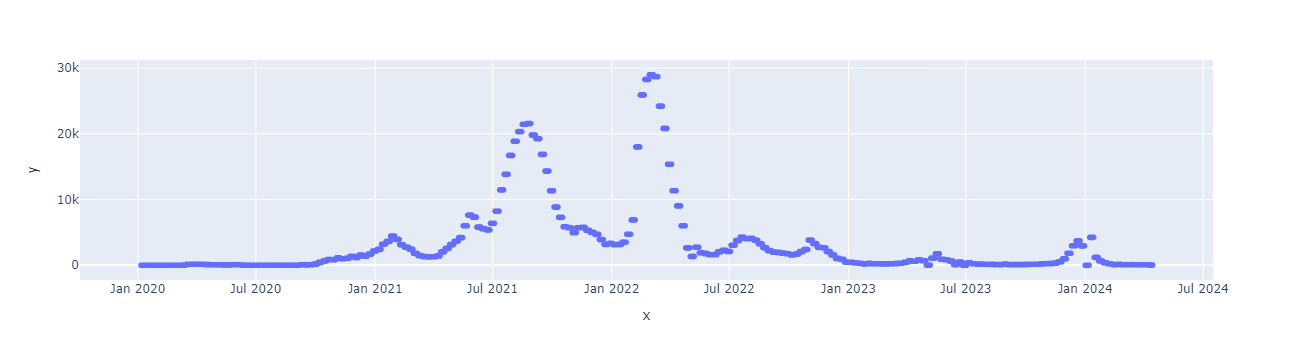

In [39]:
fig = px.scatter(x=mys_df.index, y=mys_df['new_cases'])

fig.show()

In [47]:
# try second way
mys_df_2 = target_data.loc[target_data['Country'] == 'Malaysia']
mys_df_2 = mys_df_2.rename(columns={"New_cases": "MYS"})
mys_df_2 = mys_df_2.drop(['Country', 'Cumulative_cases'], axis=1)

In [48]:
mys_df_2 = mys_df_2.resample('D').interpolate()/7

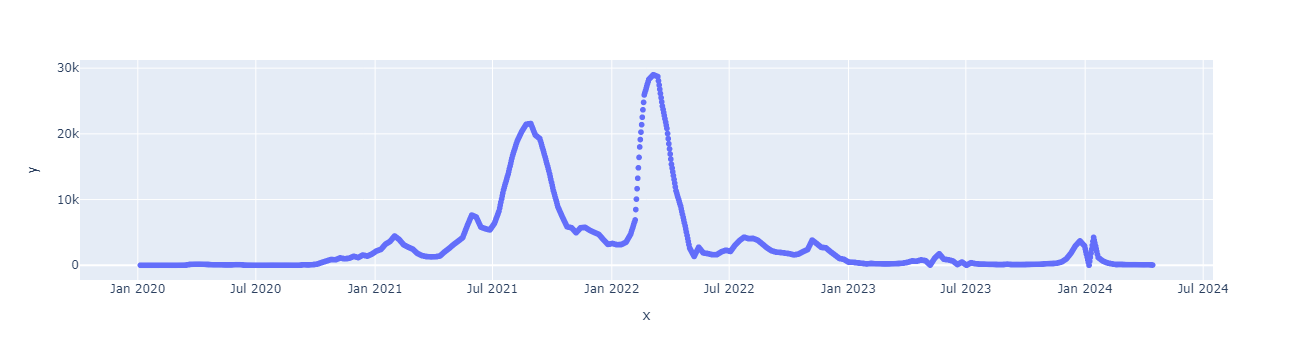

In [51]:
fig = px.scatter(x=mys_df_2.index, y=mys_df_2['MYS'])

fig.show()

In [55]:
# Paths to save data to

# First way dataset
save_path = pathlib.Path('../data/target-data/case-data.csv')

In [56]:
raw_case_df.to_csv(save_path, index = True)

In [10]:
df = pd.read_csv(save_path)

In [11]:
df

,Date_reported,MYS,PHL,VNM
0,2020-01-05,0.0,0.0,0.0
1,2020-01-12,0.0,0.0,0.0
2,2020-01-19,0.0,0.0,0.0
3,2020-01-26,4.0,0.0,2.0
4,2020-02-02,4.0,1.0,4.0
...,...,...,...,...
219,2024-03-17,593.0,0.0,0.0
220,2024-03-24,512.0,0.0,0.0
221,2024-03-31,421.0,0.0,0.0
222,2024-04-07,493.0,0.0,0.0
